In [49]:
# Importing data using pandas
import pandas as pd 

datafile = 'duct.xlsx'
testdata = pd.read_excel(datafile)
testdata.head(20)

,病案号,统计顺序,患者姓名,乳头溢液,Unnamed: 4,病理整理,病理编码,病理1（良，恶）,病理2（管内，外）,年龄,...,妊娠史,流产史,乳管扩张统计,肿物个数统计+0（个）,距乳头的距离,大小统计（直径/cm）,边界,形状,血流统计2,超声分级
0,902930,1,马晶,1.0,NaN,实性乳头状癌,6,1,0,32,...,1,0,1,1,1.0,2.0,0.0,1.0,0.0,1
1,938301,2,张淑香,1.0,NaN,非典型增生,2,1,0,50,...,2,1,1,1,1.0,1.0,0.0,0.0,0.0,1
2,1941297,3,于湘芹,1.0,NaN,导管内癌,1,1,0,61,...,4,2,1,2,1.0,2.0,1.0,1.0,2.0,2
3,1950273,4,孙振玲,1.0,NaN,筛状增生、乳管内乳头状瘤,2,1,0,39,...,2,1,1,0,NaN,NaN,NaN,NaN,NaN,1
4,944138,5,闫雅秋,1.0,NaN,实性乳头状癌,6,1,0,69,...,1,0,1,2,1.0,1.0,0.0,0.0,0.0,2
5,740829,6,赵桂芝,1.0,NaN,非典型增生,2,1,0,71,...,5,2,0,1,2.0,2.0,1.0,1.0,0.0,2
6,809665,7,苗桂荣,1.0,NaN,实性乳头状癌,6,1,0,59,...,2,1,1,1,1.0,1.0,0.0,1.0,1.0,2
7,946208,8,朱玉霞,1.0,NaN,非典型增生,2,1,0,40,...,1,0,0,2,1.0,1.0,0.0,0.0,0.0,1
8,946274,9,杨露,1.0,NaN,筛状增生、实性增生,2,1,0,46,...,1,0,1,2,1.0,1.0,0.0,0.0,0.0,1
9,908117,10,李秀华,1.0,NaN,非典型增生,2,1,0,54,...,3,2,0,1,1.0,1.0,0.0,0.0,0.0,1


In [50]:
from pycaret.classification import *
clf1 = setup(data = testdata, target = '病理2（管内，外）', train_size = 0.85)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1848
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(783, 23)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,19
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [51]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:27:01
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
3,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,Naive Bayes,0.9985,0.9986,1.0000,0.9967,0.9983,0.9969
8,Random Forest Classifier,0.9955,1.0000,0.9931,0.9967,0.9948,0.9908
9,Quadratic Discriminant Analysis,0.8829,0.8748,0.8063,0.9304,0.8576,0.7595


LightGBMError: Do not support non-ASCII characters in feature name.

In [39]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7100,0.5000,0.7143,0.5882,0.4615
1,0.8286,0.7900,0.7000,0.7000,0.7000,0.5800
2,0.9429,0.9300,0.9000,0.9000,0.9000,0.8600
3,0.9714,0.9800,1.0000,0.9091,0.9524,0.9320
4,0.7941,0.7229,0.6000,0.6667,0.6316,0.4893
5,0.8529,0.8178,0.7778,0.7000,0.7368,0.6352
6,0.8235,0.8311,0.8889,0.6154,0.7273,0.6031
7,0.8235,0.7667,0.6667,0.6667,0.6667,0.5467
8,0.8824,0.8489,0.7778,0.7778,0.7778,0.6978
9,0.7941,0.7844,0.7778,0.5833,0.6667,0.5221


In [40]:
# tuned_dt = tune_model('dt', optimize ='Recall')

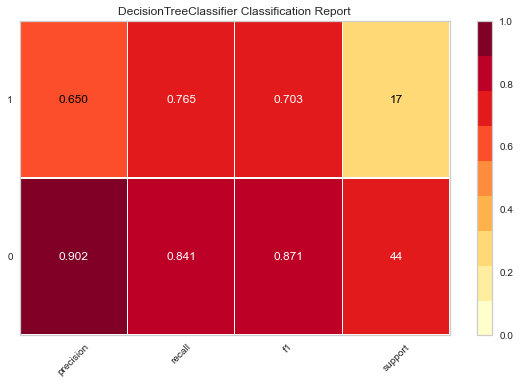

In [48]:
plot_model(dt, 'class_report')

In [42]:
pred_holdout = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8197,0.8028,0.7647,0.65,0.7027,0.5745
